<a href="https://colab.research.google.com/github/Rajat-Sri/Retail-Time-Series-Analysis/blob/main/Retail_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Retail Time Series Analysis**

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

Time series are widely used for non-stationary data, like economic, weather, stock price, and retail sales in this post. We will demonstrate different approaches for forecasting retail sales time series. Let’s get started!

In [1]:
#Importing necessary libraries

import seaborn as sns
import warnings # to ignore any warning messages
import itertools # for efficient looping
import numpy as np # for numerical computing
import pandas as pd # for handling data in dataframes
import matplotlib.pyplot as plt # for data visualization
import statsmodels.api as sm # for statistical modeling

#Setting style for data visualization
plt.style.use('fivethirtyeight')

#Adjusting font sizes and color for visualizations
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

We will be using superstore dataset.There are several categories in the Superstore sales data, we start from time series analysis and forecasting for furniture sales.

In [2]:
# Connect drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Read CSV file from Google Drive
df = pd.read_excel('/content/drive/MyDrive/Almabetter/Capstone Projects/time series analysis on superstore data/Sample - Superstore (1).xls')

# Show the first 5 rows of the dataframe
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
# Filter dataset for "Furniture" category
furniture_df = df[df['Category'] == 'Furniture']
furniture_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [8]:
# Check the shape of the dataset
furniture_df.shape


(2121, 21)

In [9]:
# Check the data types of columns
furniture_df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [10]:
# Summary statistics
furniture_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [27]:
furniture_df['Order Date'].min(), furniture_df['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

We have 4 years of data.

**Performing Some basic EDA**

<ipython-input-11-0f94f851a21c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(furniture_df['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

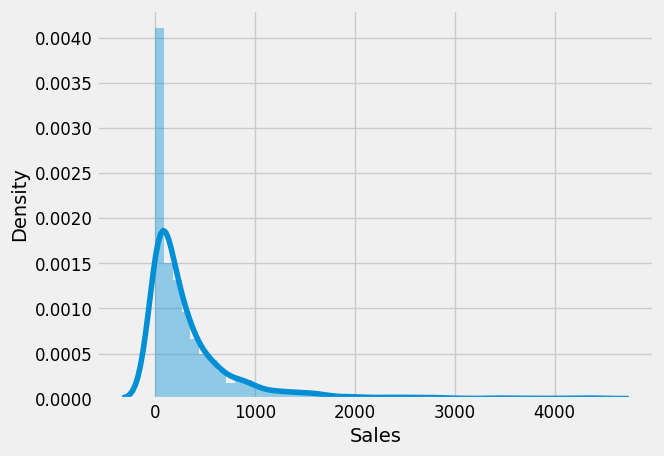

In [11]:
# Visualize the distribution of sales
sns.distplot(furniture_df['Sales'])

<Axes: xlabel='Sales', ylabel='Profit'>

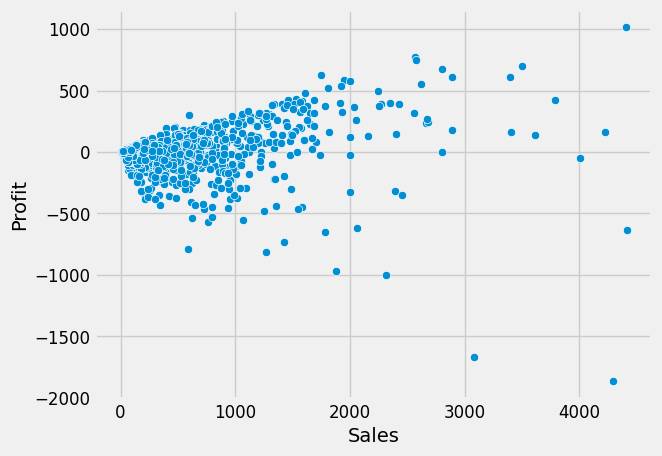

In [12]:
# Visualize the relationship between sales and profit
sns.scatterplot(x='Sales', y='Profit', data=furniture_df)

<Axes: xlabel='Sub-Category'>

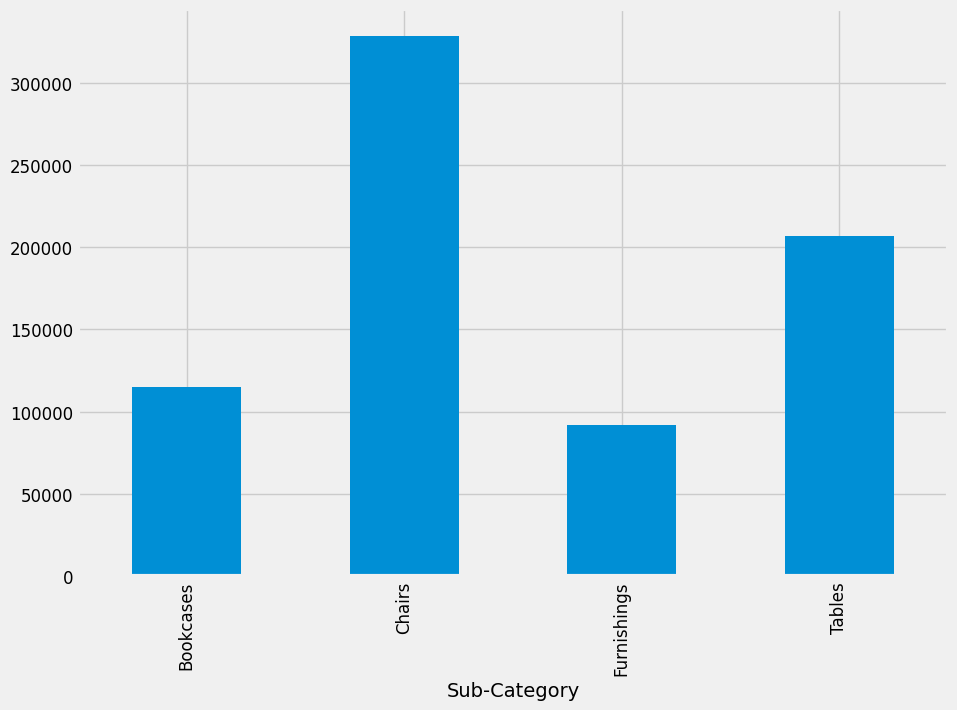

In [13]:
# Visualize the total sales by sub-category
plt.figure(figsize=(10,7))
furniture_df.groupby('Sub-Category')['Sales'].sum().plot(kind='bar')

<Axes: xlabel='State'>

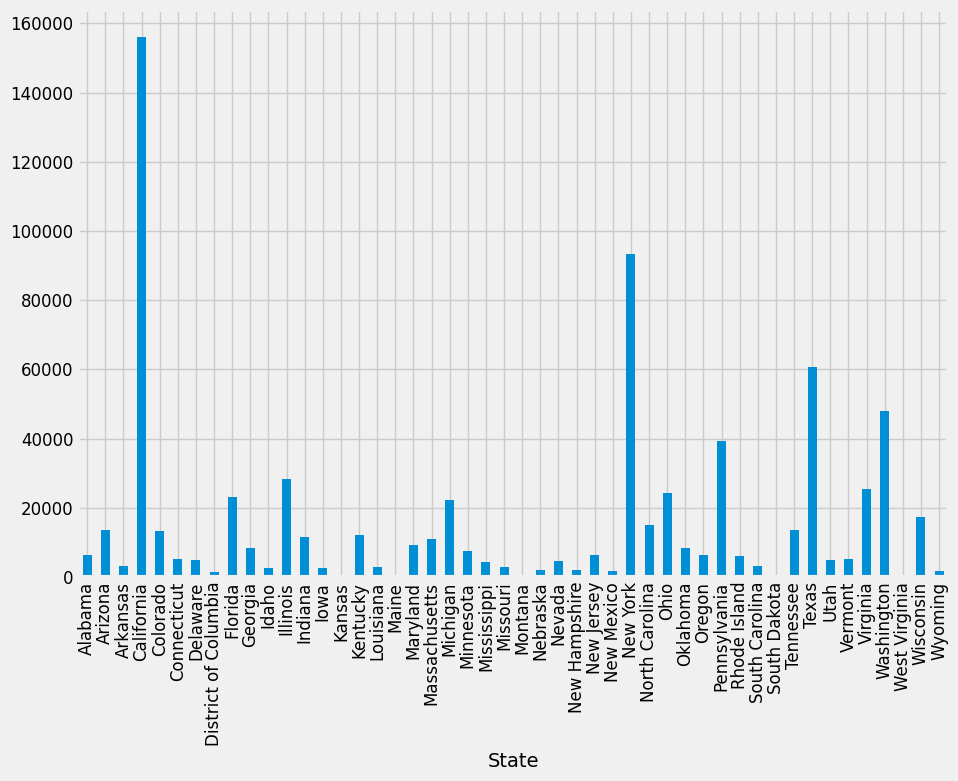

In [14]:
# Visualize the sales by state
plt.figure(figsize=(10,7))
furniture_df.groupby('State')['Sales'].sum().plot(kind='bar')

<ipython-input-15-159135235f88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture_df['Year'] = furniture_df['Order Date'].dt.year


<Axes: xlabel='Year'>

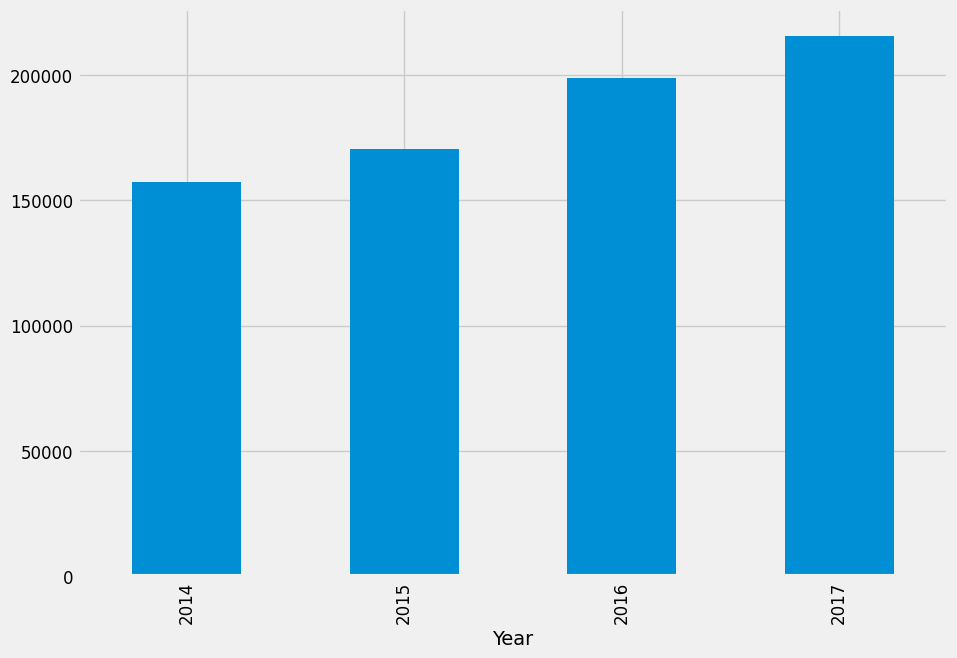

In [15]:
# Visualize the sales by year
furniture_df['Year'] = furniture_df['Order Date'].dt.year
plt.figure(figsize=(10,7))
furniture_df.groupby('Year')['Sales'].sum().plot(kind='bar')

<ipython-input-16-8302002ebb45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture_df['Month'] = furniture_df['Order Date'].dt.month


<Axes: xlabel='Month'>

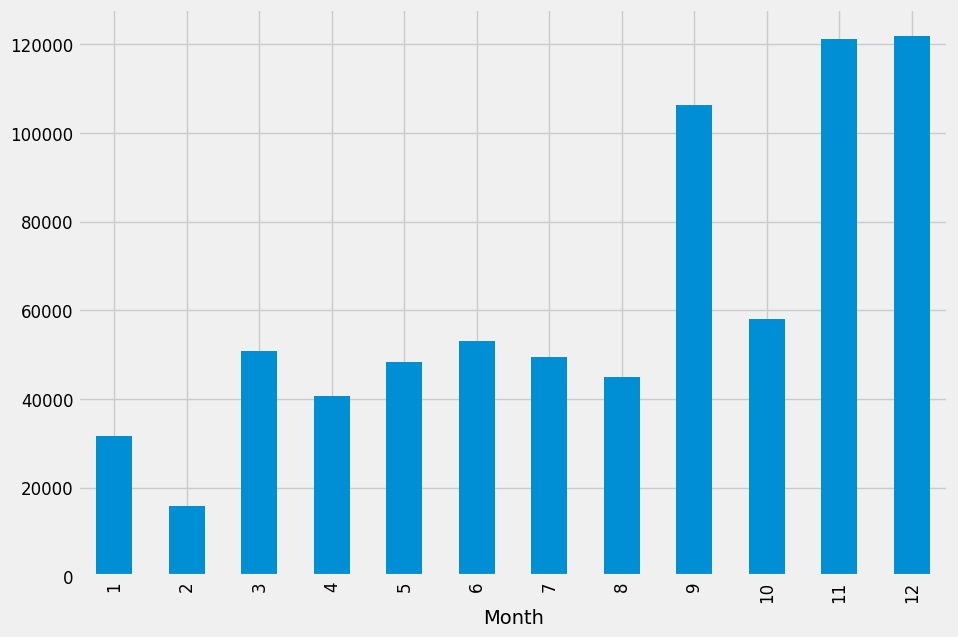

In [16]:
# Visualize the sales by month
furniture_df['Month'] = furniture_df['Order Date'].dt.month
plt.figure(figsize=(10,7))
furniture_df.groupby('Month')['Sales'].sum().plot(kind='bar')

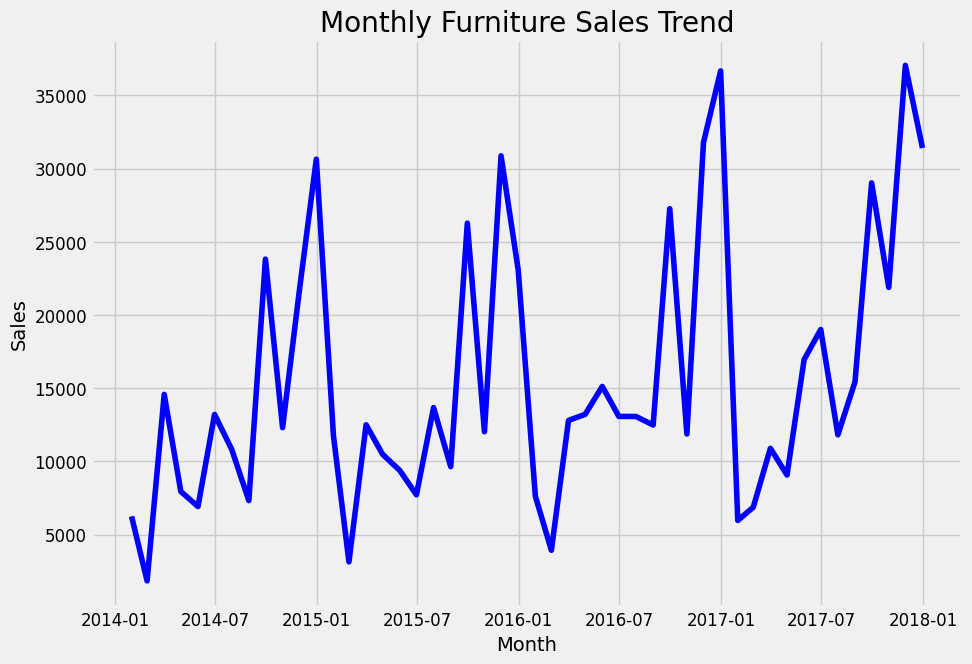

In [18]:
# Group the dataframe by month and sum the sales for each month
monthly_sales = furniture_df.groupby(pd.Grouper(key='Order Date', freq='M')).agg({'Sales': 'sum'})

# Plot the monthly sales trend
plt.figure(figsize=(10, 7))
plt.plot(monthly_sales.index, monthly_sales['Sales'], 'b-')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Furniture Sales Trend')
plt.show()

In [20]:
# Create a subset of the data with just Furniture and Office Supplies categories
subset_df = df.loc[df['Category'].isin(['Furniture', 'Office Supplies'])]


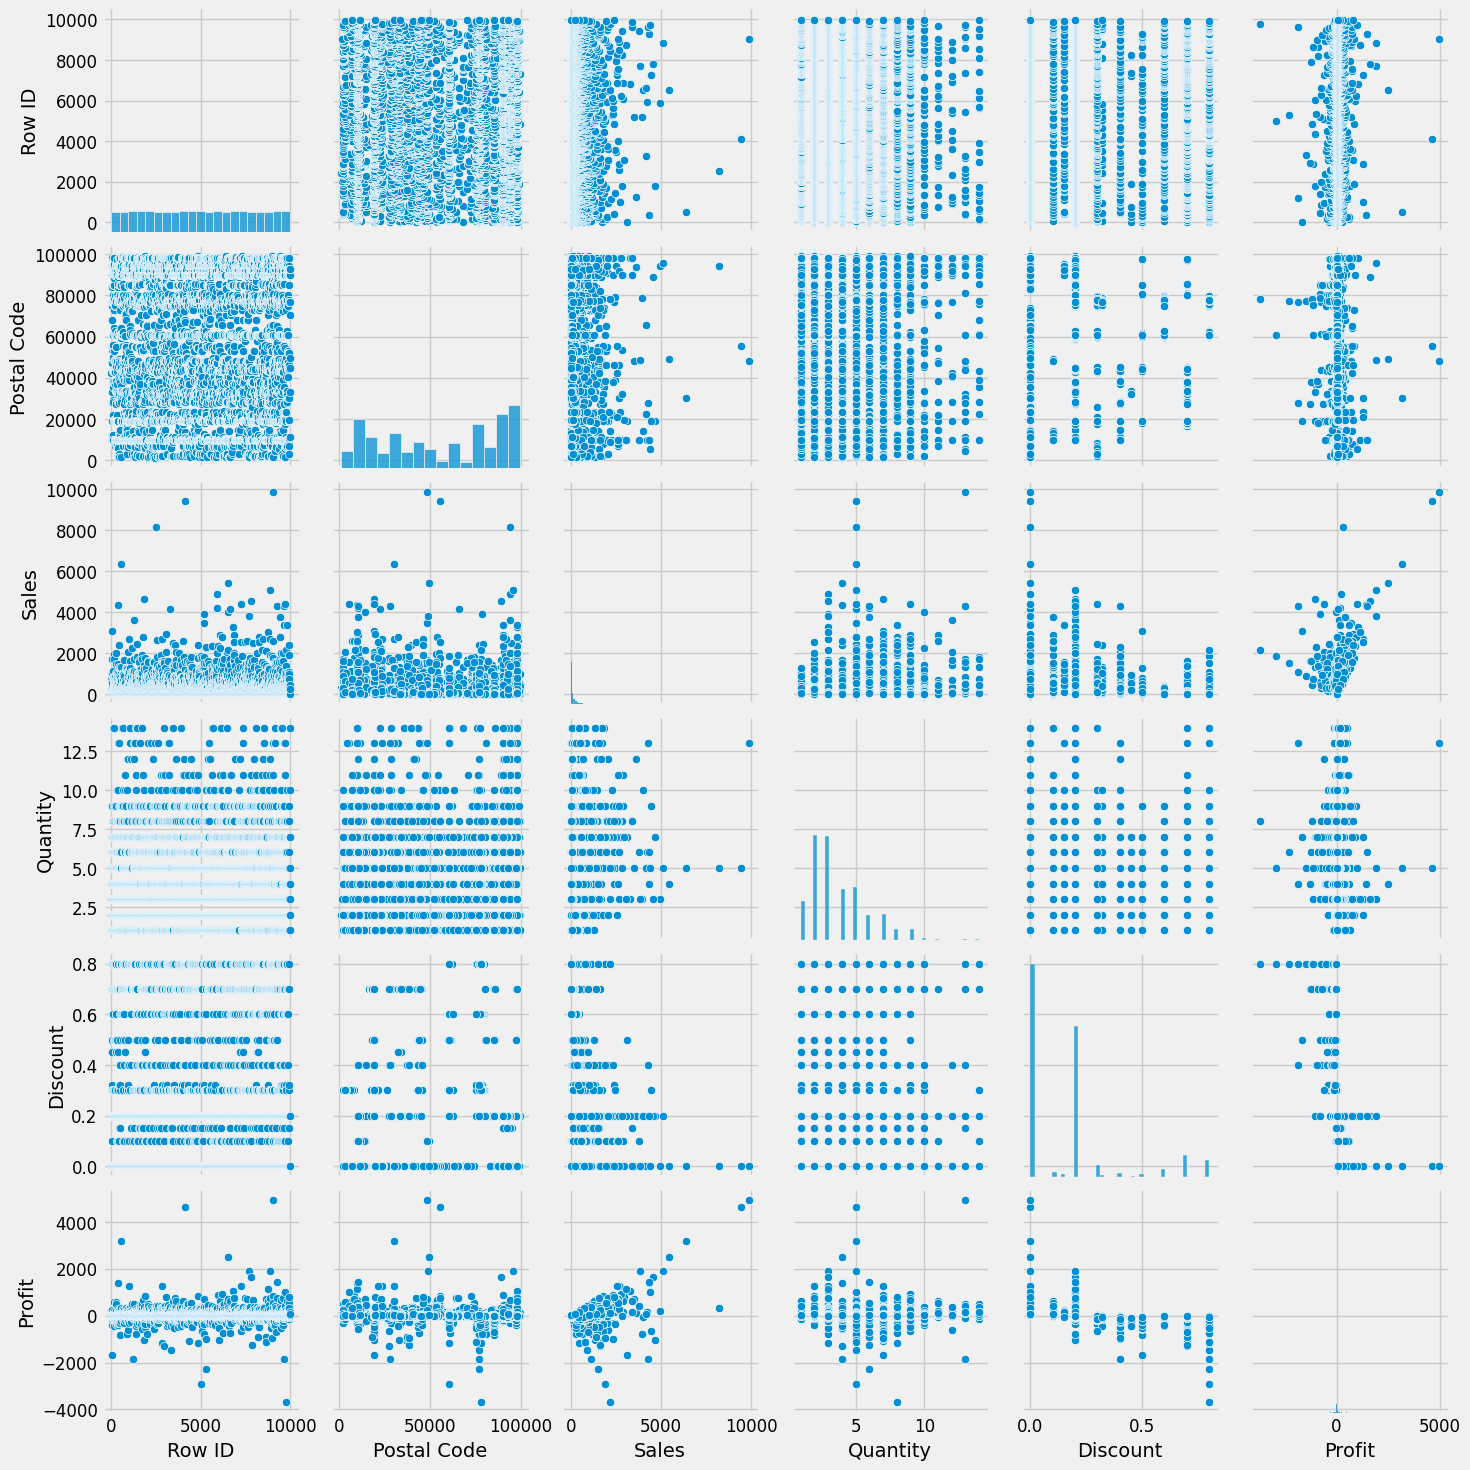

In [21]:
# Pairplot of all numerical columns in the subset
sns.pairplot(data=subset_df.select_dtypes(include=['float64', 'int64']))
plt.show()

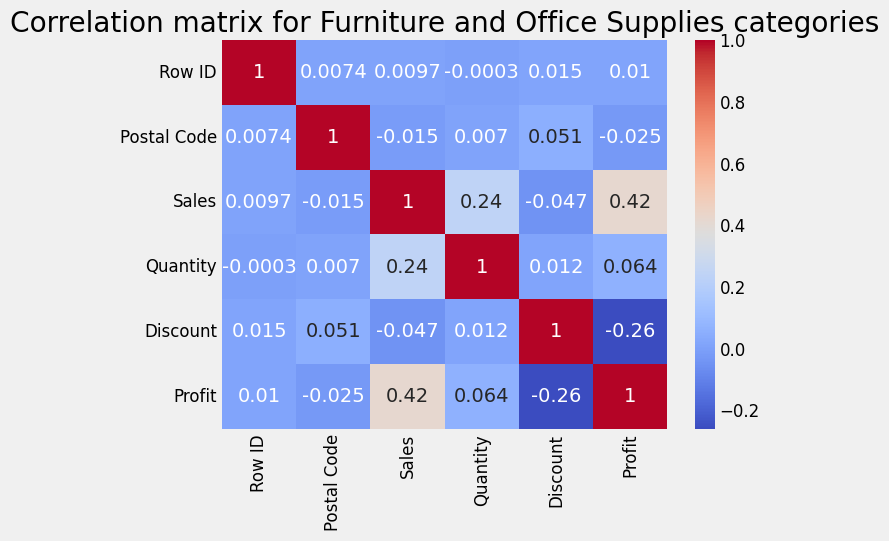

In [22]:
# Heatmap of correlations between numerical columns in the subset
corr_matrix = subset_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix for Furniture and Office Supplies categories')
plt.show()

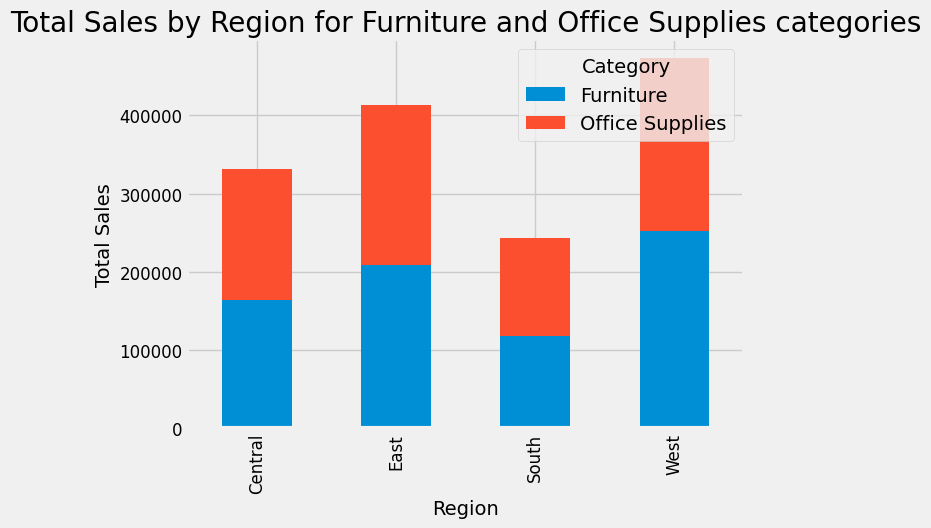

In [23]:
# Barplot of total sales for each category in each region
sales_by_region = subset_df.pivot_table(values='Sales', index='Region', columns='Category', aggfunc='sum')
sales_by_region.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region for Furniture and Office Supplies categories')
plt.show()

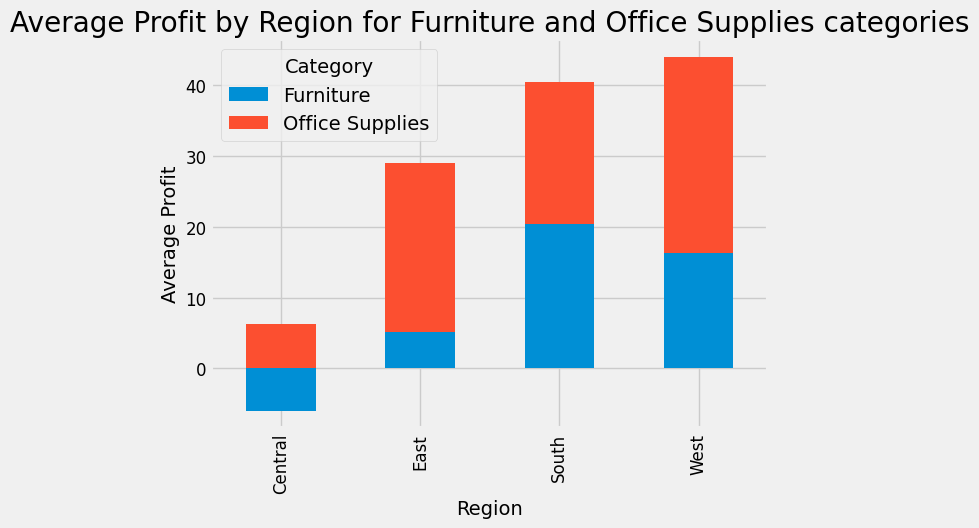

In [24]:
# Barplot of average profit for each category in each region
profit_by_region = subset_df.pivot_table(values='Profit', index='Region', columns='Category', aggfunc='mean')
profit_by_region.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Average Profit')
plt.title('Average Profit by Region for Furniture and Office Supplies categories')
plt.show()

## **Data Pre processing**

This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

In [81]:
# list containing the names of columns to be dropped from the 'furniture' dataframe.
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

#Using the drop() function, we are dropping the columns listed in cols from the 'furniture' dataframe.
furniture.drop(cols, axis=1, inplace=True)

#Using the sort_values() function, we are sorting the 'furniture' dataframe by the 'Order Date' column.
furniture = furniture.sort_values('Order Date')

#checking for any missing values in the 'furniture' dataframe.
furniture.isnull().sum()

<ipython-input-81-0a02e5b3f881>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture.drop(cols, axis=1, inplace=True)


Order Date    0
Sales         0
dtype: int64

In [82]:
# Group the 'furniture' DataFrame by 'Order Date' and sum the 'Sales' column
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


Indexing with Time Series Data

In [83]:
# Set the 'Order Date' column as the index of the 'furniture' DataFrame
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [84]:
# Resample the 'Sales' column of the 'furniture' DataFrame to monthly frequency using the start of the month as the anchor point
# Then calculate the mean of each month's values
y = furniture['Sales'].resample('MS').mean()

Have a quick peek 2017 furniture sales data.

In [85]:
# Slice the 'y' Series to include only the rows with index from 2017 onwards
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

**Visualizing Furniture Sales Time Series Data**

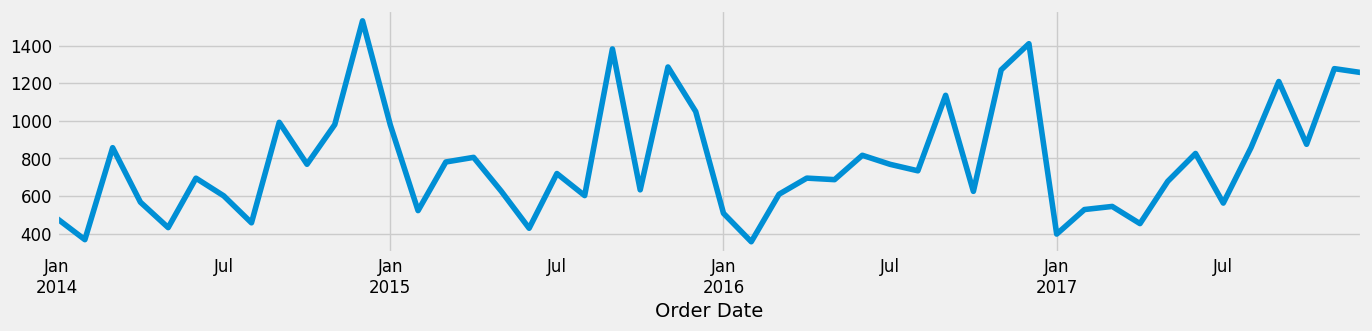

In [86]:
# Plot the 'y' Series with a figure size of 15x6
y.plot(figsize=(15, 3))

# Display the plot
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

**We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.**

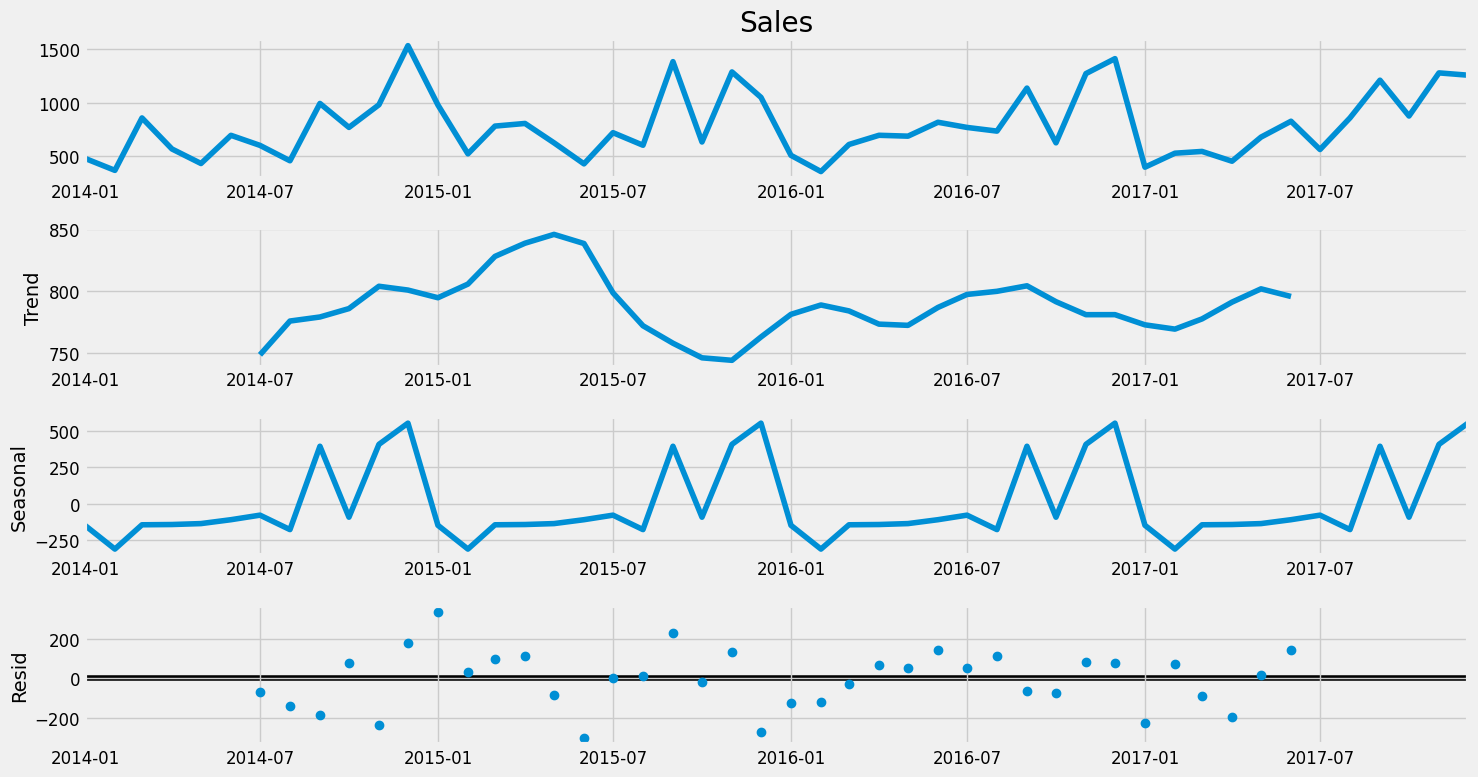

In [87]:
# Import and set the figure size of plots to 15x8 using rcParams from pylab
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

# Perform a seasonal decomposition of the 'y' Series using an additive model from statsmodels.tsa.seasonal
decomposition = sm.tsa.seasonal_decompose(y, model='additive')

# Plot the decomposition and save the figure to 'fig'
fig = decomposition.plot()

# Display the plot
plt.show()


The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.

**Time series forecasting with ARIMA**

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [88]:
# p, d, q are parameters for the ARIMA model
# Define the range of values for p, d, and q
p = d = q = range(0, 2)

# Get all possible combinations of p, d, and q
pdq = list(itertools.product(p, d, q))

# Get all possible combinations of seasonal p, d, and q with seasonality of 12
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Print examples of parameter combinations for Seasonal ARIMA
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [89]:
# Loop through all possible combinations of p, d, and q values for both seasonal and non-seasonal components of SARIMAX
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            # Define SARIMAX model with current parameter values
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            # Fit the model
            results = mod.fit()
            
            # Print the AIC value for the model with the current parameter values
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        
        # If an exception occurs during model fitting or printing, continue to the next iteration
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1523.5085449297978
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130919703
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.27028997935736
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1317.1698862853953
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803033336
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758099


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2715.646290524748
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091517
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673299


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.61482929923943


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2505.9754087946067
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946868


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576437098
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668259312


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1362.3338317546836
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.6378567269187
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.9671228167952
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1412.7664345389687
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.9113200151447
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817271


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1935.211583857393
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548482728
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.5806233401351
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.18329774427036


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2561.1684419080807
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.7574368417285


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.55766214612555
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067713


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1755.6522415154225
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.4632147852136
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.20776751609657
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.92593679351955


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1258.8183236593795
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.46646750846116
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.5842692143826
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442185808


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2529.2024607214953
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3685195814221


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.34221939659466
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.5763323876698


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2439.064033652234
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.0156002121446


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.75131881261973
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1610.3821137102082
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281135
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.2130611619097
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.3403658784638
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1387.56288308395
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.62709013454116


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.3264992504886
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019834904


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:994.7614540992078
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.476268760973


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.3873006939371
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546609034


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1397.0112715545645
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.7875439538356


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.36610144801216


The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 0, 12) yields the lowest AIC value of 297.78. Therefore we should consider this to be optimal option.

**Fitting the ARIMA model**

/usr/local/lib/python3.9/dist-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: burn. After release 0.14, this will raise.
  warnings.warn(


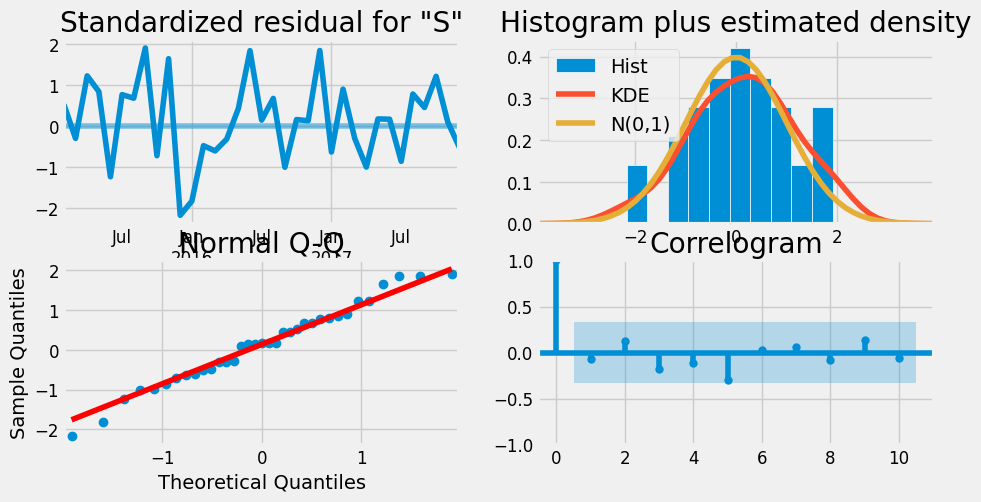

In [90]:
# Define SARIMAX model with simpler parameter values
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 0),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

# Fit the model with a smaller value for the burn parameter
results = mod.fit(maxiter=100, method='lbfgs', burn=10)

# Plot diagnostics of the fitted model
results.plot_diagnostics(figsize=(10, 5))

# Show the plot
plt.show()


It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

**Validating forecasts**

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

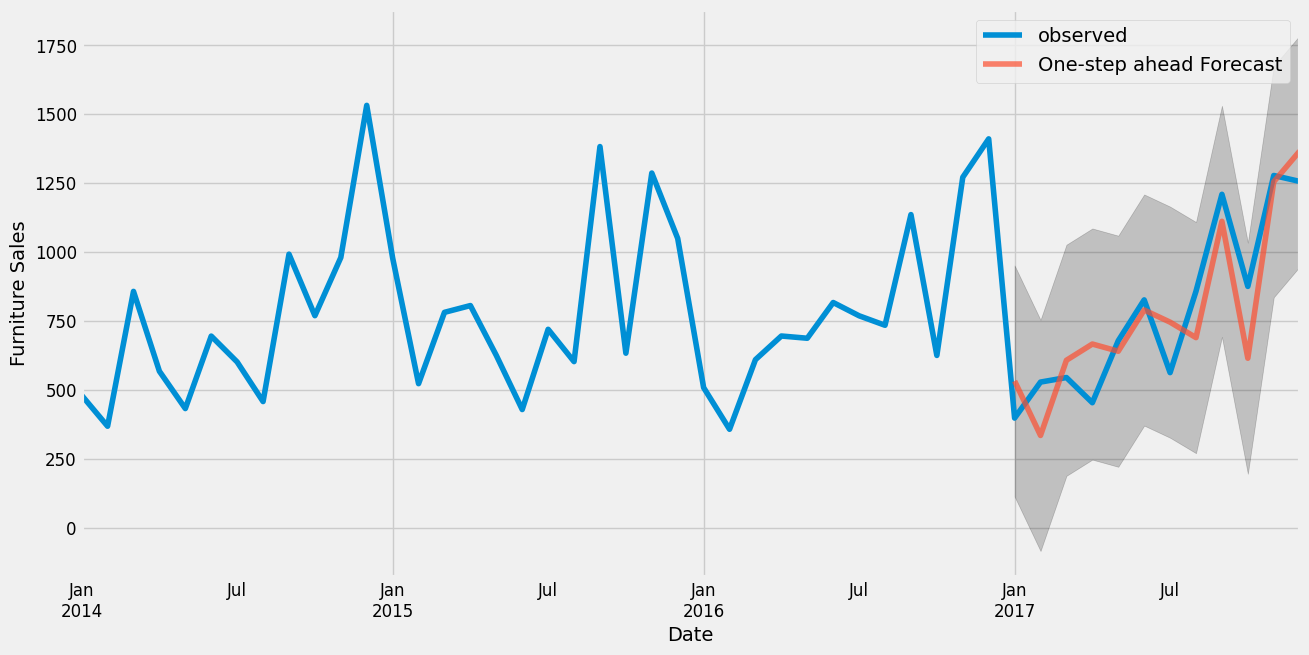

In [91]:
#The following code uses a time series model to make predictions and plot the results.
#Get prediction using a given start date
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)

#Get confidence intervals for the prediction
pred_ci = pred.conf_int()

#Plot the observed data for the time period from 2014 onwards
ax = y['2014':].plot(label='observed')

#Add the predicted mean values to the plot
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

#Shade the area between the lower and upper bounds of the confidence interval
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)

# display the plot
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

In [92]:
# Get the predicted mean values from the model
y_forecasted = pred.predicted_mean

# Select the true values from the dataset, starting from January 1st, 2017
y_truth = y['2017-01-01':]

# Calculate the Mean Squared Error between the predicted and true values
mse = ((y_forecasted - y_truth) ** 2).mean()

# Print the result to the console, rounded to two decimal places
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))


The Mean Squared Error of our forecasts is 21638.62


In [93]:
# Calculate the square root of the Mean Squared Error from the previous calculation
rmse = np.sqrt(mse)

# Print the Root Mean Squared Error to the console, rounded to two decimal places
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))


The Root Mean Squared Error of our forecasts is 147.1


- In statistics, the **mean squared error (MSE)** of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

- **Root Mean Square Error (RMSE)** tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales. Our furniture daily sales range from around 400 to over 1200. In my opinion, this is a pretty good model so far.

**Producing and visualizing forecasts**

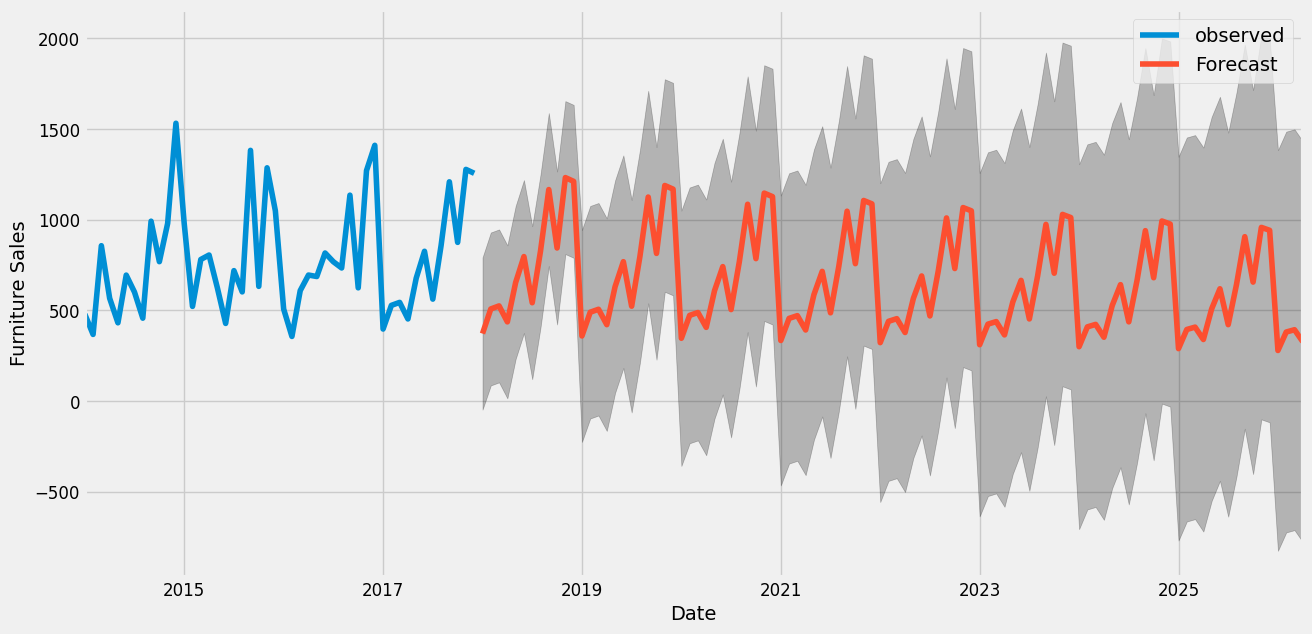

In [94]:
# Get the forecast for the next 100 steps using the fitted model
pred_uc = results.get_forecast(steps=100)

# Calculate the confidence interval for the forecast
pred_ci = pred_uc.conf_int()

# Plot the observed values from the original dataset
ax = y.plot(label='observed', figsize=(14, 7))

# Plot the predicted mean values for the forecast
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

# Shade the area between the upper and lower bounds of the confidence interval
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

# Set the x-axis label to "Date" and the y-axis label to "Furniture Sales"
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

# Add a legend to the plot and display it
plt.legend()
plt.show()


Our model clearly captured furniture sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

The above time series analysis for furniture makes me curious about other categories, and how do they compare with each other over time. Therefore, we are going to compare time series of furniture and office supplier.

**Time Series of Furniture vs. Office Supplies**

In [95]:
# create dataframes
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']

# Print the shapes of the two new DataFrames
print(furniture.shape, office.shape)

(2121, 21) (6026, 21)


According to our data, there were way more number of sales from Office Supplies than from Furniture over the years.

**Data Exploration**

We are going to compare two categories’ sales in the same time period. This means combine two data frames into one and plot these two categories’ time series into one plot.

In [96]:
# Define a list of column names to be dropped from the 'furniture' and 'office' DataFrames
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

# Drop the specified columns from the 'furniture' and 'office' DataFrames
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

# Sort the 'furniture' and 'office' DataFrames by the 'Order Date'
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

# Group the 'furniture' and 'office' DataFrames by 'Order Date' and sum the 'Sales'
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()

# Set the index of the 'furniture' and 'office' DataFrames to be the 'Order Date' column
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

# Resample the 'Sales' column of the 'furniture' and 'office' DataFrames to monthly frequency
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

# Create new 'furniture' and 'office' DataFrames with the resampled 'Sales' data and the 'Order Date' column
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})

# Merge the 'furniture' and 'office' DataFrames into a new DataFrame called 'store' and an 'inner' join on the 'Order Date' column
store = furniture.merge(office, how='inner', on='Order Date')

# Rename the 'Sales_x' and 'Sales_y' columns of the 'store' DataFrame to 'furniture_sales' and 'office_sales', respectively
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)

# Display the first five rows of the 'store'
store.head()


<ipython-input-96-4c55dcd6e659>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture.drop(cols, axis=1, inplace=True)
<ipython-input-96-4c55dcd6e659>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office.drop(cols, axis=1, inplace=True)


,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


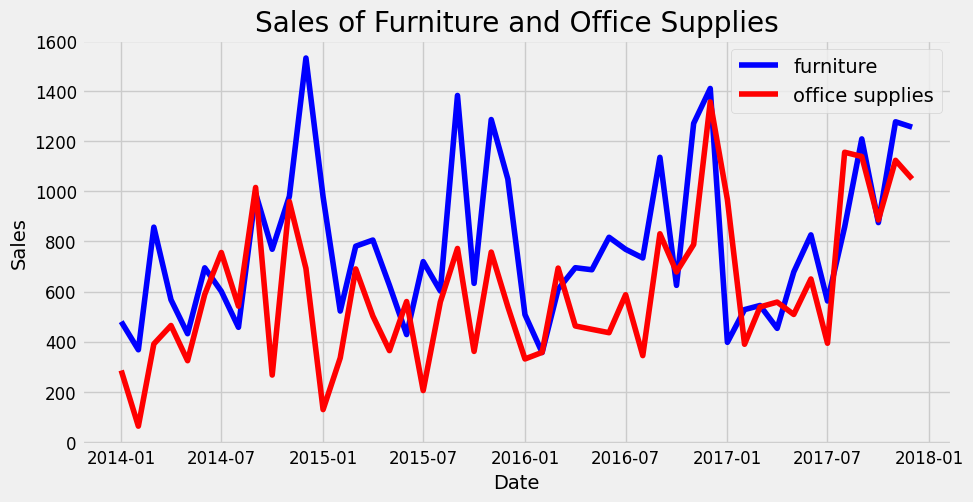

In [97]:
# Create a figure with size 10 inches by 5 inches
plt.figure(figsize=(10, 5))

# Plot the furniture sales over time in blue
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label='furniture')

# Plot the office supplies sales over time in red
plt.plot(store['Order Date'], store['office_sales'], 'r-', label='office supplies')

# Set the x-axis label to 'Date', y-axis label to 'Sales', and title to 'Sales of Furniture and Office Supplies'
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of Furniture and Office Supplies')

# Add a legend to the plot
plt.legend()


We observe that sales of furniture and office supplies shared a similar seasonal pattern. Early of the year is the off season for both of the two categories. It seems summer time is quiet for office supplies too. in addition, average daily sales for furniture are higher than those of office supplies in most of the months. It is understandable, as the value of furniture should be much higher than those of office supplies. Occasionally, office supplies passed furniture on average daily sales. Let’s find out when was the first time office supplies’ sales surpassed those of furniture’s.

In [98]:
# Find the index of the first row where office supplies sales exceed furniture sales
idx = np.where(store['office_sales'] > store['furniture_sales'])[0]
first_idx = np.min(list(idx))

# Get the date of the first occurrence of office supplies sales exceeding furniture sales
first_date = store.loc[first_idx, 'Order Date']

# Format the date as a string and print a message
print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))


Office supplies first time produced higher sales than furniture is 2014-07-01.


## **Time Series Modeling with Prophet**

Forecasting tool Prophet is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. Therefore, we are using Prophet to get a model up and running.

In [99]:
!pip install pystan==2.19.1.1
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826165 sha256=a0862f0eb80b2afa57ee2c652c2ce0dd396c6e53234cd2c72747cda33b20ce4d
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.6.0
    Uninstalling pystan-3.6.0:
      Successfully uninstalled pystan-3.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached numpy-1.24.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=94

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append 

<Figure size 1800x600 with 0 Axes>

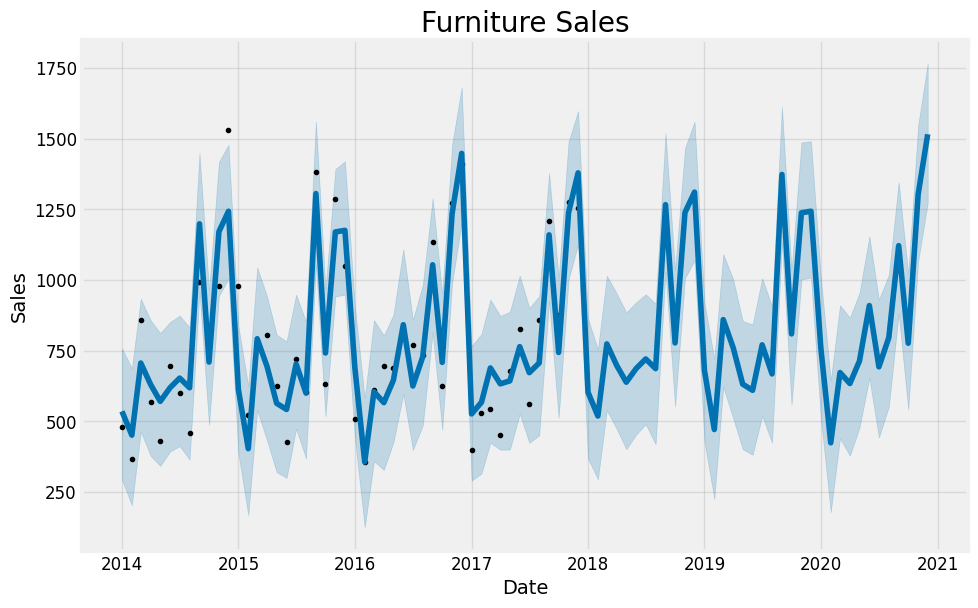

In [101]:
# Import the Prophet library
from fbprophet import Prophet

# Rename the columns in the furniture DataFrame to match the Prophet format
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Create a Prophet model for the furniture sales data
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

# Rename the columns in the office supplies DataFrame to match the Prophet format
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Create a Prophet model for the office supplies sales data
office_model = Prophet(interval_width=0.95)
office_model.fit(office)

# Generate a DataFrame with 36 months of future dates for furniture sales
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')

# Use the furniture model to predict sales for the future dates
furniture_forecast = furniture_model.predict(furniture_forecast)

# Generate a DataFrame with 36 months of future dates for office supplies sales
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')

# Use the office supplies model to predict sales for the future dates
office_forecast = office_model.predict(office_forecast)

# Create a plot of the furniture sales predictions
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel='Date', ylabel='Sales')
plt.title('Furniture Sales');


Text(0.5, 1.0, 'Office Supplies Sales')

<Figure size 1800x600 with 0 Axes>

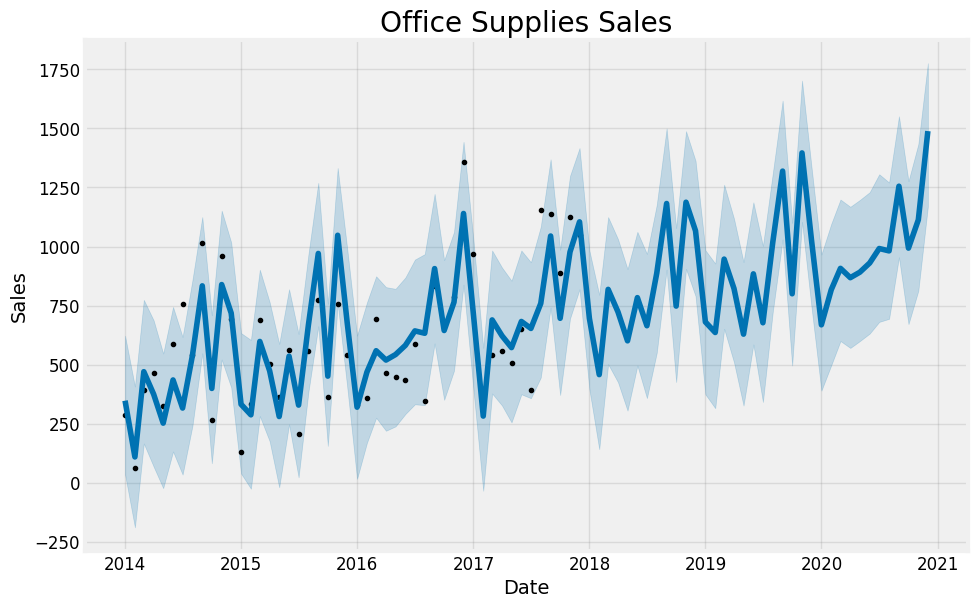

In [102]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 6))

# Plot the forecasted values
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')

# Set the title of the plot
plt.title('Office Supplies Sales')


**Compare Forecasts**

We already have the forecasts for three years for these two categories into the future. We will now join them together to compare their future forecasts.

In [103]:
# Create a list of column names for the furniture_forecast DataFrame
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]

# Create a list of column names for the office_forecast DataFrame
office_names = ['office_%s' % column for column in office_forecast.columns]

# Create copies of the furniture_forecast and office_forecast DataFrames
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()

# Rename the columns of the merge_furniture_forecast and merge_office_forecast DataFrames
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names

# Merge the merge_furniture_forecast and merge_office_forecast DataFrames on the 'furniture_ds' and 'office_ds' columns
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how='inner', left_on='furniture_ds', right_on='office_ds')

# Rename the 'furniture_ds' column to 'Date' and drop the 'office_ds' column in the forecast DataFrame
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)

# Display the first few rows of the forecast DataFrame
forecast.head()


,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,726.057713,293.119645,758.419147,726.057713,726.057713,-190.685662,-190.685662,-190.685662,-190.685662,...,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,0.0,0.0,0.0,347.490278
1,2014-02-01,727.494023,203.191786,687.785970,727.494023,727.494023,-276.377703,-276.377703,-276.377703,-276.377703,...,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,0.0,0.0,0.0,109.240162
2,2014-03-01,728.791335,462.952283,933.861395,728.791335,728.791335,-22.389755,-22.389755,-22.389755,-22.389755,...,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,0.0,0.0,0.0,470.211349
3,2014-04-01,730.227645,377.923622,857.468848,730.227645,730.227645,-100.141158,-100.141158,-100.141158,-100.141158,...,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,0.0,0.0,0.0,374.687188
4,2014-05-01,731.617622,342.333271,812.454764,731.617622,731.617622,-160.815662,-160.815662,-160.815662,-160.815662,...,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,0.0,0.0,0.0,252.306682


**Trend and Forecast Visualization**

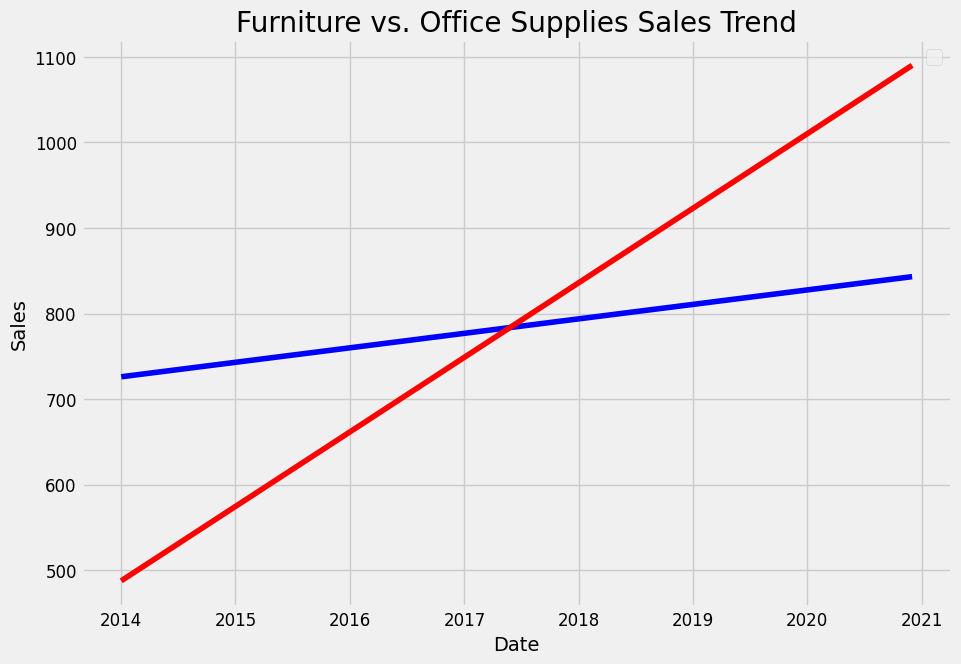

In [104]:
# Set the figure size to be 10x7 inches
plt.figure(figsize=(10, 7))

# Plot the furniture_trend column against the Date column using a blue solid line
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')

# Plot the office_trend column against the Date column using a red solid line
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')

# Add a legend to the plot, label the x-axis as 'Date', and label the y-axis as 'Sales'
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')

# Set the title of the plot to be 'Furniture vs. Office Supplies Sales Trend'
plt.title('Furniture vs. Office Supplies Sales Trend');


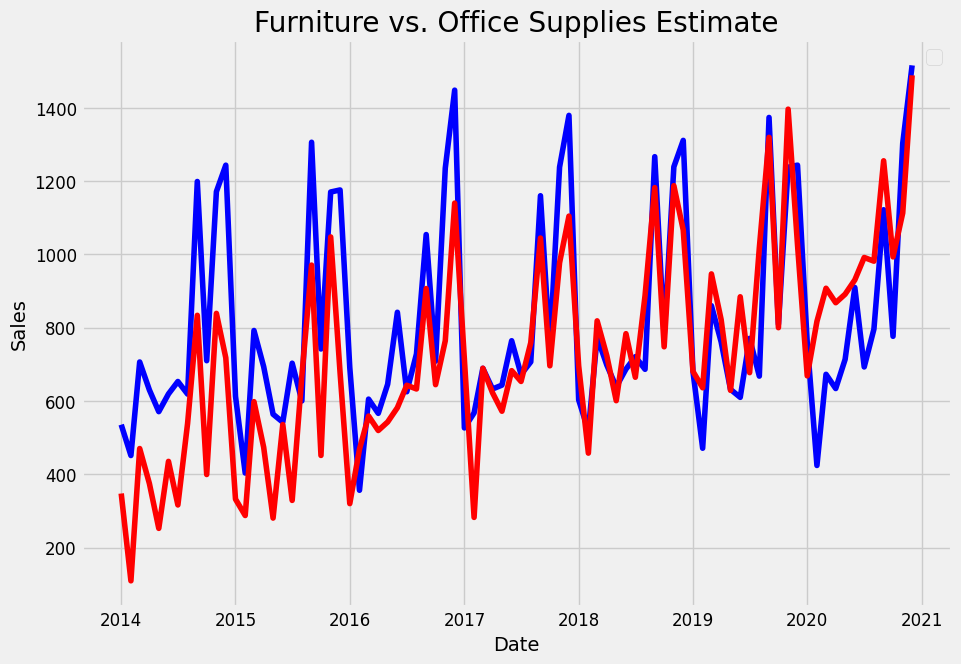

In [105]:
# Set the figure size to be 10x7 inches
plt.figure(figsize=(10, 7))

# Plot the furniture_yhat column against the Date column using a blue solid line
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')

# Plot the office_yhat column against the Date column using a red solid line
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')

# Add a legend to the plot, label the x-axis as 'Date', and label the y-axis as 'Sales'
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')

# Set the title of the plot to be 'Furniture vs. Office Supplies Estimate'
plt.title('Furniture vs. Office Supplies Estimate');


**Trends and Patterns**

Now, we can use the Prophet Models to inspect different trends of these two categories in the data.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


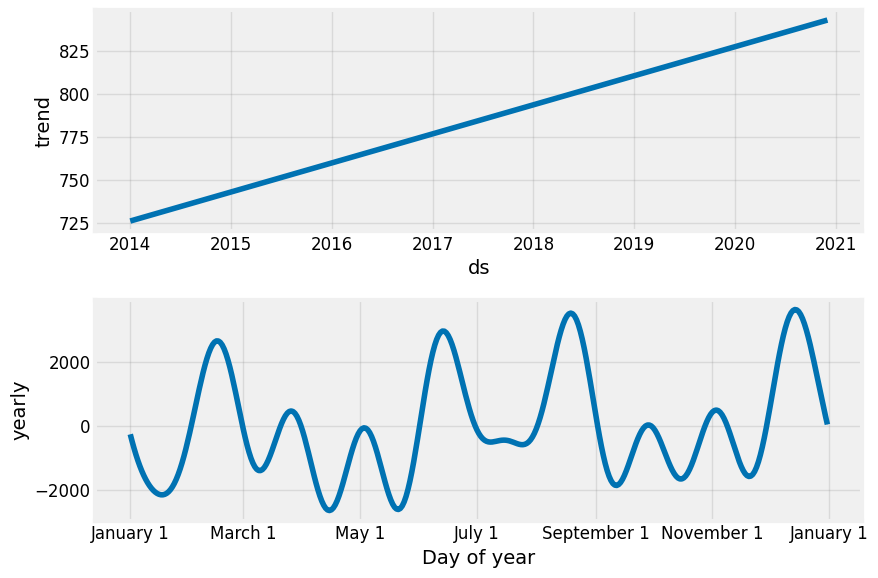

In [106]:
# Plot the trend, weekly seasonality, and yearly seasonality of the furniture model's forecast
furniture_model.plot_components(furniture_forecast);


/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


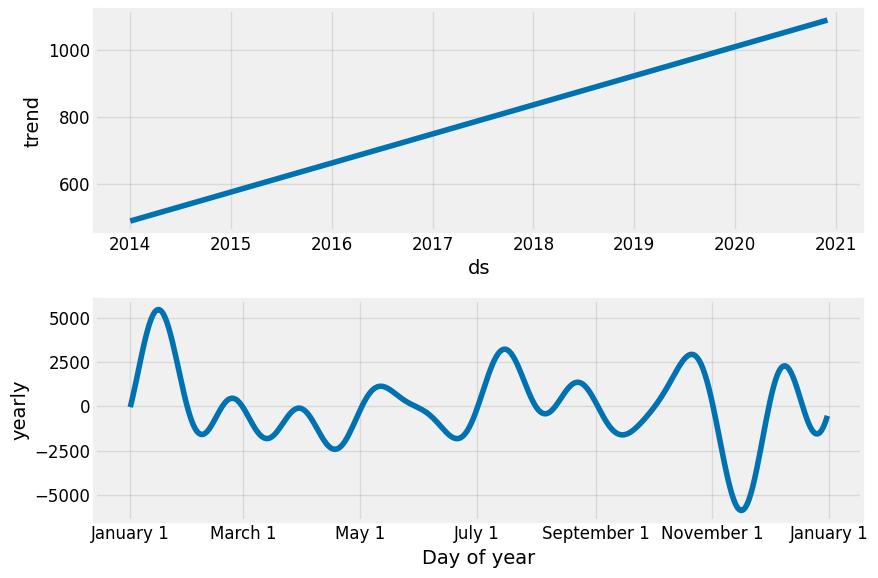

In [107]:
# Plot the trend, weekly seasonality, and yearly seasonality of the office model's forecast
office_model.plot_components(office_forecast);

Good to see that the sales for both furniture and office supplies have been linearly increasing over time and will be keep growing, although office supplies’ growth seems slightly stronger.

The worst month for furniture is April, the worst month for office supplies is February. The best month for furniture is December, and the best month for office supplies is October.

## **Detailed summary of the steps involved in this project:**

Data Preprocessing: The first step in any data analysis project is to preprocess the data. This involves handling missing values, dealing with outliers, correcting data types, and creating new features if needed. In this project, we preprocessed the superstore data and extracted the furniture and office supplies categories for analysis.

Exploratory Data Analysis (EDA): EDA is the process of analyzing and visualizing data to gain insights and identify patterns. In this project, we performed EDA on the furniture and office supplies categories separately, using techniques such as data visualization, summary statistics, and hypothesis testing. We analyzed the sales trends, seasonal patterns, and other factors that may affect sales.

Time Series Analysis: Time series analysis is a statistical technique that involves analyzing time-dependent data to make forecasts or predictions. In this project, we used the ARIMA model and Prophet tool to analyze the furniture and office supplies sales trends and make predictions about future sales.

Model Evaluation: Once we have built the time series models, we need to evaluate their performance to ensure that they are accurate and reliable. In this project, we used metrics such as mean squared error (MSE), root mean squared error (RMSE), and mean absolute error (MAE) to evaluate the accuracy of our models.

Interpretation and Insights: The final step in any data analysis project is to interpret the results and derive actionable insights. In this project, we found that both furniture and office supplies sales have been steadily increasing over time, with office supplies showing slightly stronger growth. We also found that the worst months for furniture sales are April and the worst months for office supplies sales are February, while the best months for furniture sales are December and the best months for office supplies sales are October.

Overall, this project involved a comprehensive analysis of retail time series data to gain insights into the sales trends and patterns for furniture and office supplies.